<a href="https://colab.research.google.com/github/Frutta111/Deep-Learning-In-PyTorch/blob/main/5_Making_New_Customized_Layers_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Making New Customized Layers in PyTorch**

In this notebook, we will learn how to create new customized layers which we can use as a building block in our neural networks in PyTorch. We will provide 2 examples of layers:

*   The SplitLinear layer
*   The DropNorm layer

Finally, we will train two neural network models on the Fashion-MNIST data. One model will use the built-in layers of PyTorch, while the other will use the new layer we created.




# **1. Implementation of SplitLinear layer in Pytorch**

**Layer Description:**

The SplitLinear layer is a custom PyTorch module designed to perform linear transformations on halves of the input tensor separately and then concatenate the results.
The input tensor is split along the feature dimension into two halves. Each half of the input tensor undergoes a linear transformation followed by a ReLU activation function independently.The transformed halves are concatenated along the feature dimension to produce the final output tensor


**Advantages:**

1.   Parameter Efficiency: By splitting the input tensor and performing linear transformations separately, the SplitLinear layer effectively reduces the number of parameters compared to applying a single linear transformation to the entire input. This can be advantageous in reducing overfitting and computational complexity, especially in scenarios with large input feature spaces.
2.   Non-Linearity:The ReLU activation function applied after each linear transformation introduces non-linearity into the network, enabling it to learn complex relationships within the data.
3.   Flexibility: The SplitLinear layer can be used as a building block in neural network architectures, allowing for flexibility in designing models tailored to specific tasks and requirements.

**Limitations and Considerations of the implementation:**
1.   Fixed input shape:  NxM dimension input where N is the batch dimension and M is the feature dimension
2.   Fixed Split Size: The splitting mechanism assumes that the input tensor's feature dimension can be evenly divided into two halves. This may not always be suitable for all input shapes and sizes.
3.   ReLUs as Activation: The ReLU activation function is applied after each linear transformation by default. While ReLU is commonly used and effective, it may not always be the best choice depending on the specific requirements of the task.




See diagram below for NxM dimension input where N is the batch dimension and M is the feature dimension. As explain above, the layer splits the input tensor into two halves, applies same linear transformations to each half separatly , activates Relue , and then concatenates the results to return to the original input size .

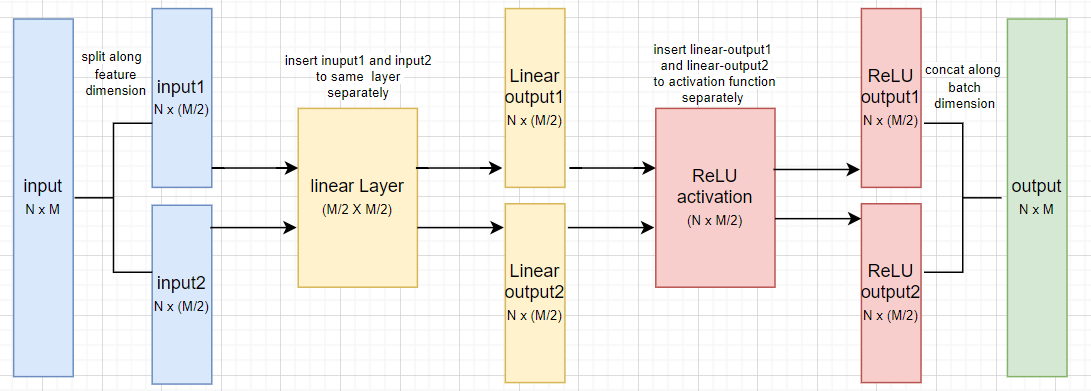

**Number of parameters:**

The total number of parameters of the SplitLinear layer is much smaller than the number of parameters of the nn.Linear layer.

In SplitLinear(M,M) layer there are $\frac{M}{2}$  input features and $\frac{M}{2}$ output features , so in total we get: $(\frac{M}{2})^2$ weights + $\frac{M}{2}$ bias parameters.

In nn.Linear(M,M) layer there are $M$ input features and $M$ output features , so in total we get: $M^2$ weights + $M$ bias parameters.

So in total, SplitLinear(M,M) has $\frac{M}{2}(\frac{M}{2}+1)$ parameters and  nn.Linear(M,M) has $M(M+1)$.

Let calculte the ratio: $\frac{\frac{M}{2}(\frac{M}{2}+1)}{M(M+1)} = \frac{(\frac{M}{2}+1)}{2(M+1)} = \frac{M+2}{4(M+1)}\approx \frac{1}{4}$  when M is large.

**The Geadient:**

Denote one sample input by,
\begin{align}
  𝐱 = \begin{bmatrix}
          x_{0} \\
          x_{1} \\
          \vdots \\
          x_{M-1}
        \end{bmatrix}
    =
        \begin{bmatrix}
          \tilde{𝐱}_{1} \\
          \tilde{𝐱}_{2}
        \end{bmatrix}
\end{align}
where $𝐱 \in \mathbb{R}^M $  and    $ \tilde{𝐱}_{1}, \tilde{𝐱}_{2} \in \mathbb{R}^\frac{M}{2} $  .

Denote the output of the linear layer by,
\begin{align}
   \tilde{𝐳}_{1} = 𝐖 \tilde{𝐱}_{1} + 𝐛   , \quad \tilde{𝐳}_{2} = 𝐖 \tilde{𝐱}_{2} + 𝐛
\end{align}

where $ 𝐖 \in \mathbb{R}^{\frac{M}{2} \times \frac{M}{2}} $ and $ 𝐛 \in \mathbb{R}^\frac{M}{2} $ are the parameters of the Split-Linear layer,  and $ \tilde{𝐳}_{1}, \tilde{𝐳}_{2} \in \mathbb{R}^\frac{M}{2} $ .

Let ,
\begin{align}
 𝐳= \begin{bmatrix}
       z_{0} \\
       z_{1} \\
       \vdots \\
       z_{M-1}   
    \end{bmatrix}
    =
     \begin{bmatrix}
          \tilde{𝐳}_{1} \\
          \tilde{𝐳}_{2}
        \end{bmatrix}
\end{align}

where  $ 𝐳 \in \mathbb{R}^M$ .

Denote by $\tilde{𝐲}_1 = ReLU(𝐳_1)$ and $\tilde{𝐲}_2 = ReLU(𝐳_2)$, where $\tilde{𝐲}_1, \tilde{𝐲}_2 \in \mathbb{R}^\frac{M}{2}$.

Accordingly, denote the output of the Split-Linar layer by,
Denote by ,
\begin{align}
𝐲 = \begin{bmatrix}
       y_{0} \\
       y_{1} \\
       \vdots \\
       y_{M-1}   
    \end{bmatrix}
    =
     \begin{bmatrix}
          \tilde{𝐲}_{1} \\
          \tilde{𝐲}_{2}
        \end{bmatrix}
\end{align}

where $𝐲 \in \mathbb{R}^M $.



The gradient we are interesting in is :

\begin{align}
  \frac{\partial{C}}{\partial{𝐖}}  , \frac{\partial{C}}{\partial{𝐛}}
\end{align}
where $C$ is the loss (cost) function.

We can use the chain rule of derivation and write,
\begin{align}
  \frac{\partial{C}}{\partial{𝐖}} =\frac {\partial{C}}{\partial{𝐲}}\cdot \frac{\partial{𝐲}}{\partial{𝐳}} \cdot \frac{\partial{𝐳}}{\partial{𝐖}}
  \quad and \quad  
  \frac{\partial{C}}{\partial{𝐛}} =\frac {\partial{C}}{\partial{𝐲}}\cdot \frac{\partial{𝐲}}{\partial{𝐳}} \cdot \frac{\partial{𝐳}}{\partial{𝐛}}
\end{align}

Due to the splitting of the input into two components that proceed separately to the operation of the linear layer and the subsequent activation, then their effect on the gradient will be additive and we get,

\begin{align}
  \frac{\partial{C}}{\partial{𝐖}} =\frac {\partial{C}}{\partial{𝐲}}\cdot \frac{\partial{\tilde{𝐲}_{1}}}{\partial{\tilde{𝐳}_{1}}} \cdot \frac{\partial{\tilde{𝐳}_{1}}}{\partial{𝐖}}
  +
  \frac {\partial{C}}{\partial{𝐲}}\cdot \frac{\partial{\tilde{𝐲}_{2}}}{\partial{\tilde{𝐳}_{2}}} \cdot \frac{\partial{\tilde{𝐳}_{2}}}{\partial{𝐖}}
\\
\\
  \frac{\partial{C}}{\partial{𝐛}} =\frac {\partial{C}}{\partial{\tilde{𝐲}_{1}}}\cdot \frac{\partial{\tilde{𝐲}_{1}}}{\partial{\tilde{𝐳}_{1}}} \cdot \frac{\partial{\tilde{𝐳}_{1}}}{\partial{𝐛}}
  +
  \frac {\partial{C}}{\partial{\tilde{𝐲}_{2}}}\cdot \frac{\partial{\tilde{𝐲}_{2}}}{\partial{\tilde{𝐳}_{2}}} \cdot \frac{\partial{\tilde{𝐳}_{2}}}{\partial{𝐛}}
\end{align}



To see the gradient calculation click [here](https://drive.google.com/file/d/1C4YAieYzwnzXICIvtTs8qrDV4ViyYYnk/view?usp=sharing)




**Generalization for splitting into 4:**

The analysis of the gradient can be extended to the case of division into 4 layers easily. The number of parameters, compared to a normal linear layer, will decrease 16 times for a large M, and will be equals to $\frac{M}{4}( \frac{M}{4} + 1)$, including $\frac{M^2}{16}$ weights and $\frac{M}{4}$ bias parameters .The effect on the gradient will be divided into 4 additive components in a very similar way to the analysis for the case of dividing by 2.

**Parameters Initialization:**

I used  `torch.nn.init.uniform_` to implement parameters initialization as in the structured Linear layer as described in the following,

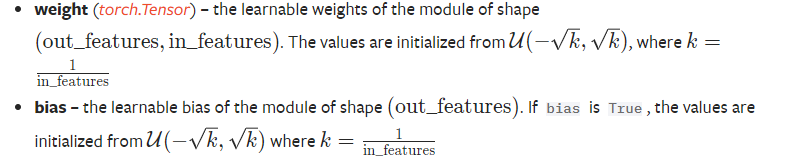


Firstly, we want to initialize the parameters with different values. Otherwise, the result will be that the neurons of the layer will be updated identically by the optimization algorithm, and in subsequent iterations, they will continue to perform the same computation. Therefore, our first requirement for the initialization strategy is** "breaking symmetry"**. We want the parameters to be initialized so that each neuron performs a different computation and, accordingly, each neuron updates differently with the iterations of the optimization algorithm. To meet this requirement, we will initialize the parameters randomly.

Secondly, we want to draw the parameters from values that are not too large because small parameters can lead to very small derivative values, causing the optimization algorithm to not move from the starting point. This phenomenon is called "**vanishing gradient**". Conversely, initializing the parameters with values that are too large in absolute value will lead to very large derivative values, causing the algorithm to diverge. This phenomenon is called "**exploding gradient**."

Initializing the layer's parameters with values from a uniform distribution in a symmetric interval around zero, which becomes smaller as the number of input features of the layer increases, **produces non-extreme values and reduces the variance** of the drawn values. This better serves the optimization and is particularly important in models with many parameters where extreme values can be problematic for the reasons mentioned above.

**Remarks:**

To learn tips on how to implement the splitlinear layer, I used the following sources:
here:   https://pytorch.org/docs/stable/generated/torch.nn.Linear.html  
and here: https://github.com/pytorch/pytorch/blob/main/torch/nn/modules/linear.py



### Implementation of SplitLinear

In [ ]:
import torch
from torch import nn
from torch import Tensor
from torch.nn import functional as F


class SplitLinear(nn.Module):

  def __init__(self, in_features, out_features, bias=True ):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.bias = bias
        self.in_split_size = in_features // 2
        self.out_split_size = in_features // 2

        # Construct linear layer half size of the original input
        self.L = nn.Linear(in_features=self.in_split_size
                           , out_features=self.out_split_size, bias=self.bias)

        with torch.no_grad():
          # Kaiming_uniform:
          bound = 1 / ((self.in_split_size) ** 0.5)
          # Xavier method:
          # bound = (6 / (self.in_split_size + self.out_split_size)) ** 0.5

        # No gradient will be recorded for this operation
        torch.nn.init.uniform_(self.L.weight, -bound, bound)
        print("\nInit weights values: " , self.L.weight)
        if bias:
          torch.nn.init.uniform_(self.L.bias, -bound, bound)
          print("\nInit bias value: ", self.L.bias)

  def split(self, input, k):
        k = self.in_split_size
        split_1 = input[:, :k]
        split_2 = input[:, k:]
        return split_1 , split_2

  def forward(self, input):

        print("\nInput tensor:", input , "Input tensor shape", input.shape, sep="\n" )

        # Split data
        t1, t2 = self.split(input, self.in_split_size)
        print("\nSplits input tensor along features dimension:", t1 , t2, sep="\n"  )

        # Apply linear transformation and  ReLU activation function to t1 and t2 separately
        l1 = F.relu(self.L(t1))
        print("\nWeights for the first half:", self.L.weight)
        print("\nFirst split after Linear:", self.L(t1) ,"First split after ReLU:",  l1, sep="\n"  )

        l2 = F.relu(self.L(t2))
        print("\nWeights for the second half:", self.L.weight)
        print("\nSecond split after Linear:", self.L(t2) ,"Second split after ReLU:",  l2, sep="\n"  )

        # Concatenate the linear outputs to return to size of the original input
        output = torch.cat((l1, l2), dim=1)
        print("\noutput tensor:", output , "output tensor shape", output.shape, sep="\n" )

        return output


### Example

In [ ]:
# Test with example input
X = torch.tensor([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3 , 3, 3]], dtype=torch.float32)

# Adjust the size of the linear layer dynamically
model = nn.Sequential(SplitLinear(4, 4))

output = model(X)


Init weights values:  Parameter containing:
tensor([[ 0.5242,  0.3851],
        [ 0.2506, -0.4740]], requires_grad=True)

Init bias value:  Parameter containing:
tensor([-0.4967, -0.4829], requires_grad=True)

Input tensor:
tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])
Input tensor shape
torch.Size([3, 4])

Splits input tensor along features dimension:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]])
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]])

Weights for the first half: Parameter containing:
tensor([[ 0.5242,  0.3851],
        [ 0.2506, -0.4740]], requires_grad=True)

First split after Linear:
tensor([[ 0.4126, -0.7062],
        [ 1.3219, -0.9296],
        [ 2.2312, -1.1530]], grad_fn=<AddmmBackward0>)
First split after ReLU:
tensor([[0.4126, 0.0000],
        [1.3219, 0.0000],
        [2.2312, 0.0000]], grad_fn=<ReluBackward0>)

Weights for the second half: Parameter containing:
tensor([[ 0.5242,  0.3851],
        [ 0.2506, -0.4740]]

# **2. Implementation of DropNorm layer in Pytorch**

The DropNorm layer combines dropout and batch normalization procedures in a single module. Below is a description of the layer and its advantages:
The DropNorm layer offers a unified approach to regularization and normalization in neural networks, leveraging the advantages of dropout and batch normalization while simplifying the model architecture. By combining these techniques, the layer provides improved regularization, stability, and efficiency during training, contributing to better performance and generalization of the model.

**Layer Description:**


1.  **Dropout Procedure**: Randomly resets exactly half of the features in the input tensor during training. This helps in reducing overfitting by preventing co-adaptation of neurons.
The dropout mask is generated for each batch independently, ensuring stochasticity during training.

2.  **Normalization Procedure:** Normalizes each sample in the input tensor by subtracting the mean of the un-dropped features and dividing by their standard deviation.
This step ensures that the network's activations are centered and scaled, which can improve the convergence speed and stability during training. The learning process is expected to be smoother and more efficient.
Epsilon (1e-5) is added to the standard deviation to avoid division by zero.
2.  **Scaling and Bias:** Since normalized activations may not necessarily be optimal for the continuation of the network, after normalization, the activations are further adjusted using learnable scaling and bias parameters (gamma and beta), respectively.
These parameters allow the network to learn the optimal scaling and shifting of the normalized activations, so the final output of the layer is:
$y_i^{[k]} = \gamma_i\hat{x}_i^{[k]} + \beta_i $ and we intialized $\gamma_i , \beta_i$ such that $y_i = \hat{x}_i$.


We will demonstrate the procedures in a structured way with a toy example and then we will assemble the layer from them.

### introduction

Let's build the layer step by step using a toy example,

In [ ]:
import torch

X = torch.arange(60).reshape(2, 2, 3, 5)
print(X)

tensor([[[[ 0,  1,  2,  3,  4],
          [ 5,  6,  7,  8,  9],
          [10, 11, 12, 13, 14]],

         [[15, 16, 17, 18, 19],
          [20, 21, 22, 23, 24],
          [25, 26, 27, 28, 29]]],


        [[[30, 31, 32, 33, 34],
          [35, 36, 37, 38, 39],
          [40, 41, 42, 43, 44]],

         [[45, 46, 47, 48, 49],
          [50, 51, 52, 53, 54],
          [55, 56, 57, 58, 59]]]])


## Dropout procedure:

The dropout procedures will perform a random reset of exactly half of the features in the input tensor. The selection will be the same for each batch.  For this we will want to sample exactly half of the domain 0 up to the total number of features. We note that the first dimension in the input tensor is the batch dimension to perform correct calculations.

In [ ]:
print("Size of input : ", X.size())
print("Input_shape (excluding batch dimension) : " , X.size()[1:])
print("Total number of elements (features): ",  X.size()[1:].numel())

Size of input :  torch.Size([2, 2, 3, 5])
Input_shape (excluding batch dimension) :  torch.Size([2, 3, 5])
Total number of elements (features):  30


In [ ]:
  def generate_mask(X, drop_rate):

      # Size of features  (excluding batch dimension)
      input_shape =  X.size()[1:]

      # Calculate total number of elements
      total_elements  = input_shape.numel()

      # Calculate number of elements to dropout
      to_drop = int(total_elements *  drop_rate)

      # Generates sample of indices from 0 to total_elements - 1 with randperm
      indices_to_drop = torch.randperm(total_elements)[:to_drop]

      # Create boolean mask tensor
      mask = torch.ones(input_shape, dtype=torch.bool)
      mask.view(-1)[indices_to_drop] = 0

      # Include batch dimension
      mask = mask.unsqueeze(0)

      return mask

Example:

In [ ]:
mask = generate_mask(X, 0.5)
print("Size of mask", mask.size())
print("mask: \n", mask)


Size of mask torch.Size([1, 2, 3, 5])
mask: 
 tensor([[[[False, False,  True, False,  True],
          [ True,  True,  True,  True, False],
          [ True, False,  True,  True, False]],

         [[False, False, False,  True, False],
          [ True, False, False,  True,  True],
          [ True, False,  True, False, False]]]])


In [ ]:
print("masked X:\n", X * mask)

masked X:
 tensor([[[[ 0,  0,  2,  0,  4],
          [ 5,  6,  7,  8,  0],
          [10,  0, 12, 13,  0]],

         [[ 0,  0,  0, 18,  0],
          [20,  0,  0, 23, 24],
          [25,  0, 27,  0,  0]]],


        [[[ 0,  0, 32,  0, 34],
          [35, 36, 37, 38,  0],
          [40,  0, 42, 43,  0]],

         [[ 0,  0,  0, 48,  0],
          [50,  0,  0, 53, 54],
          [55,  0, 57,  0,  0]]]])


## Normalization Procedure:

We would like to calculate the normalization by standardizing each fitzer according to the mean and standard deviation of the other fitzers of the sample. For this, we will have to perform a mean and variance calculation along all the dimensions without the batch dimension.

In [ ]:
print("size of X : ", X.size())
print("number of dimention of X: ", X.dim())
dim = tuple(range(1, X.dim()))
print("list of dimentions excluding batch dimention : ", dim)


size of X :  torch.Size([2, 2, 3, 5])
number of dimention of X:  4
list of dimentions excluding batch dimention :  (1, 2, 3)


Mean and variance Calcultaion - In the training process we will want to run the normalization on the input tensor after the dropout. On the other hand, in the process of predicting new samples, we will want to run the normalization on the input tensor without the dropout, so we will write the following normalization functions with the option of choosing to calculate with/without a dropout mask. In the first step we will calculate the average and the variance, and in the second step we will perform the normalization itself.

In [ ]:
def calc_mean_and_var(X, mask=None) :

  if mask is not None:
      # Get X after dropout
      X = X * mask
      # Calculate total number of non-dropout elements
      total_elements =  torch.sum(mask)
  else:
      # Size of features  (excluding batch dimension)
      input_shape =  X.size()[1:]
      # Calculate total number of elements
      total_elements  = input_shape.numel()

  # Create list of dimentions excluding batch dimention
  dim = tuple(range(1, X.dim()))

  # Calculate mean along dimensions other than the batch dimension
  mean = X.sum(dim) / total_elements

  # Calculate variance along dimensions other than the batch dimension
  variance =  ((X**2).sum(dim) / total_elements) - mean**2

  return mean , variance

Example:

In [ ]:
mean , variance = calc_mean_and_var(X, mask)
print("number of non-droppet element: ",torch.sum(mask))
print("mean of non-droppet element of each sample:", mean)
print("variance of non-droppet element of each sample:",variance)


number of non-droppet element:  tensor(15)
mean of non-droppet element of each sample: tensor([13.6000, 43.6000])
variance of non-droppet element of each sample: tensor([67.7067, 67.7068])


We will note that the mean and the variance are tensors with one dimension whose size is the size of the batch. Therefore, in order to be able to normalize a feature in each example separately by reducing the mean and dividing by the standard deviation, we will have to expand the scalars to the dimensions of the input tensor. For this we will use a function unsqueeze.

In [ ]:
def Normalize(X, mask=None) :

  # Calculate mean and variance of input tensor
  mean , variance = calc_mean_and_var(X, mask)

  # Calculate square root of variance, add eps = 1e-5 to avoid division by 0
  std = torch.sqrt(variance + 1e-5)

  # Initialize the expanded mean and std_dev tensors
  mean_expanded = mean.clone()
  std_expanded = std.clone()

  # Expand mean tensor along all dimensions except the batch dimension
  for _ in range(X.dim() - 1):
      mean_expanded = mean_expanded.unsqueeze(-1)
      std_expanded = std_expanded.unsqueeze(-1)

  # Normalization
  normed_X = (X - mean_expanded) / std_expanded

  if mask is not None:
      # Apply mask to drop out the dropped elements
      normed_X = normed_X * mask

  print("Size of expanded parameters", mean_expanded.size())

  return normed_X

Example:

In [ ]:
normed_masked_X = Normalize(X, mask)
print("\nnormed_masked_X :\n", normed_masked_X)

Size of expanded parameters torch.Size([2, 1, 1, 1])

normed_masked_X :
 tensor([[[[-0.0000, -0.0000, -1.4098, -0.0000, -1.1667],
          [-1.0452, -0.9236, -0.8021, -0.6806, -0.0000],
          [-0.4375, -0.0000, -0.1944, -0.0729,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  0.5347,  0.0000],
          [ 0.7778,  0.0000,  0.0000,  1.1424,  1.2639],
          [ 1.3854,  0.0000,  1.6285,  0.0000,  0.0000]]],


        [[[-0.0000, -0.0000, -1.4097, -0.0000, -1.1667],
          [-1.0452, -0.9236, -0.8021, -0.6806, -0.0000],
          [-0.4375, -0.0000, -0.1944, -0.0729,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  0.5347,  0.0000],
          [ 0.7778,  0.0000,  0.0000,  1.1424,  1.2639],
          [ 1.3854,  0.0000,  1.6285,  0.0000,  0.0000]]]])


## Implementation of DropNorm

In [ ]:
import torch
from torch import nn

class DropNorm(nn.Module):
  '''
  This layer performs the following procedures in the specified order:
  1) Dropout Procedure - Randomly resets exactly half of the features in the input tensor.
     The selection will be the same for each batch.
  2) Normalization Procedure - Normalizes each sample in the input tensor by subtracting
     the mean of the un-dropped features and dividing by their standard deviation, with
     the addition of epsilon (1e-5) to avoid division by zero.

  Notice: Since the normalized activations may not necessarily be optimal for the
  continuation of the network, the final output of the layer is calculated as
  y = gamma * normed_X + beta, where the parameters gamma and beta are scaling and
  bias parameters, respectively, which will be learned during the training process.
  These parameters are initialized such that y = normed_X.
  '''

  def __init__(self, input_shape, drop_rate = 0.5):
      """
      Initializes the DropNorm module.

      Args:
           input_shape (tuple):  Size of features  (excluding batch dimension)
           drop_rate (float): The dropout rate.
      """

      super().__init__()

      self.drop_rate = drop_rate

      self.gamma = nn.Parameter(torch.ones(input_shape))  # Scaling parameter
      self.beta = nn.Parameter(torch.zeros(input_shape))  # Bias parameter

  def generate_mask(self, X, drop_rate):
      """
      Generates a dropout mask.

      Args:
          X (torch.Tensor): Input tensor.
          drop_rate (float): The dropout rate.

      Returns:
          torch.Tensor: Dropout mask (boolean).
      """

      # Size of features  (excluding batch dimension)
      input_shape =  X.size()[1:]

      # Calculate total number of elements
      total_elements  = input_shape.numel()

      # Calculate number of elements to dropout
      to_drop = int(total_elements *  drop_rate)

      # Generates sample of indices from 0 to total_elements - 1 with randperm
      indices_to_drop = torch.randperm(total_elements)[:to_drop]

      # Create boolean mask tensor
      mask = torch.ones(input_shape, dtype=torch.bool, device=X.device)
      mask.view(-1)[indices_to_drop] = 0

      # Include batch dimension
      mask = mask.unsqueeze(0)

      return mask


  def calc_mean_and_var(self, X, mask=None) :
      """
      Calculates the mean and variance of the input tensor
      along all it's non-masked elements

      Args:
          X (torch.Tensor): Input tensor.
          mask (torch.Tensor, optional): Dropout mask.

      Returns:
          torch.Tensor: Mean of the input tensor.
          torch.Tensor: Variance of the input tensor.
      """

      if mask is not None:
          # Get X after dropout
          X = X * mask
          # Calculate total number of non-dropout elements
          total_elements =  torch.sum(mask)
      else:
          # Size of features  (excluding batch dimension)
          input_shape =  X.size()[1:]
          # Calculate total number of elements
          total_elements  = input_shape.numel()

      # Create list of dimentions excluding batch dimention
      dim = tuple(range(1, X.dim()))

      # Calculate mean along dimensions other than the batch dimension
      mean = X.sum(dim) / total_elements

      # Calculate variance along dimensions other than the batch dimension
      variance =  ((X**2).sum(dim) / total_elements) - mean**2

      return mean , variance


  def Normalize(self, X, mask=None) :
      """
      Normalizes the input tensor along all it's non-masked elements.

      Args:
          X (torch.Tensor): Input tensor.
          mask (torch.Tensor, optional): Dropout mask.

      Returns:
          torch.Tensor: Normalized tensor.
      """

      # Calculate mean and variance of input tensor
      mean , variance = self.calc_mean_and_var(X, mask)

      # Calculate square root of variance, add eps = 1e-5 to avoid division by 0
      std = torch.sqrt(variance + 1e-5)

      # Initialize the expanded mean and std_dev tensors
      mean_expanded = mean.clone()
      std_expanded = std.clone()

      # Expand mean tensor along all dimensions except the batch dimension
      for _ in range(X.dim() - 1):
          mean_expanded = mean_expanded.unsqueeze(-1)
          std_expanded = std_expanded.unsqueeze(-1)

      # Normalization
      normed_X = (X - mean_expanded) / std_expanded

      if mask is not None:
          # Apply mask to drop out the dropped elements
          normed_X = normed_X * mask

      return normed_X


  def forward(self, X):

      if self.training:

        # Dropout procedure
        mask = self.generate_mask(X, self.drop_rate)
        masked_X = X * mask

        # Normalization procedure
        normed_X = self.Normalize(X, mask)

      else:
        normed_X = self.Normalize(X)
        normed_X = (1-self.drop_rate)*normed_X

      y = self.gamma * normed_X + self.beta

      return y


Now let's see how to switch to the GPU. This code snippet ensures that your PyTorch operations will use a GPU if one is available, falling back to the CPU if not. This is useful for making your code adaptable to different hardware environments.

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

torch.cuda.is_available()

True

Let's demonstrate with a toy example and compare the differences between our custom DropNorm layer and the built-in normalization layers of torch: DropNorm combined with BatchNorm2d or LayerNorm.

In [ ]:
X = torch.arange(60).reshape(2, 2, 3, 5)
X = X.to(device).float()  # Move input tensor to device

In [ ]:
model = DropNorm((2, 3, 5) , 0.5).to(device)
model.train()
output = model(X)
print(output)
print(output.device)

tensor([[[[-1.6261, -1.5003, -1.3746,  0.0000,  0.0000],
          [ 0.0000, -0.8717,  0.0000,  0.0000,  0.0000],
          [-0.3688, -0.2431, -0.1173,  0.0084,  0.1341]],

         [[ 0.0000,  0.3856,  0.0000,  0.6370,  0.7627],
          [ 0.0000,  1.0142,  0.0000,  0.0000,  1.3914],
          [ 0.0000,  0.0000,  1.7686,  0.0000,  0.0000]]],


        [[[-1.6261, -1.5003, -1.3746,  0.0000,  0.0000],
          [ 0.0000, -0.8717,  0.0000,  0.0000,  0.0000],
          [-0.3688, -0.2431, -0.1173,  0.0084,  0.1341]],

         [[ 0.0000,  0.3856,  0.0000,  0.6370,  0.7627],
          [ 0.0000,  1.0142,  0.0000,  0.0000,  1.3914],
          [ 0.0000,  0.0000,  1.7686,  0.0000,  0.0000]]]], device='cuda:0',
       grad_fn=<AddBackward0>)
cuda:0


In [ ]:
model = DropNorm((2, 3, 5), 0.5).to(device)
model.eval()
output = model(X)
print(output)
print(output.device)

tensor([[[[-0.8376, -0.7799, -0.7221, -0.6643, -0.6066],
          [-0.5488, -0.4910, -0.4333, -0.3755, -0.3177],
          [-0.2600, -0.2022, -0.1444, -0.0867, -0.0289]],

         [[ 0.0289,  0.0867,  0.1444,  0.2022,  0.2600],
          [ 0.3177,  0.3755,  0.4333,  0.4910,  0.5488],
          [ 0.6066,  0.6643,  0.7221,  0.7799,  0.8376]]],


        [[[-0.8376, -0.7799, -0.7221, -0.6643, -0.6066],
          [-0.5488, -0.4910, -0.4333, -0.3755, -0.3177],
          [-0.2600, -0.2022, -0.1444, -0.0867, -0.0289]],

         [[ 0.0289,  0.0867,  0.1444,  0.2022,  0.2600],
          [ 0.3177,  0.3755,  0.4333,  0.4910,  0.5488],
          [ 0.6066,  0.6643,  0.7221,  0.7799,  0.8376]]]], device='cuda:0',
       grad_fn=<AddBackward0>)
cuda:0


In [ ]:
torch_model = nn.Sequential(
                  nn.Dropout(p=0.5),
                  nn.BatchNorm2d(2)  # Assuming 2 input channels
)
torch_model.to(device)
torch_model.train()
torch_output = torch_model(X.float())
print(torch_output)
print(torch_output.device)

tensor([[[[-0.7264, -0.6682, -0.6099, -0.7264, -0.7264],
          [-0.7264, -0.7264, -0.3185, -0.7264, -0.2020],
          [-0.7264, -0.7264, -0.0272, -0.7264, -0.7264]],

         [[ 0.0292, -0.7011,  0.1266,  0.1753,  0.2239],
          [-0.7011, -0.7011, -0.7011, -0.7011,  0.4674],
          [ 0.5161, -0.7011, -0.7011, -0.7011, -0.7011]]],


        [[[-0.7264, -0.7264,  1.1382, -0.7264,  1.2547],
          [ 1.3130,  1.3713,  1.4296, -0.7264, -0.7264],
          [ 1.6044, -0.7264,  1.7209,  1.7792,  1.8375]],

         [[-0.7011, -0.7011, -0.7011,  1.6358, -0.7011],
          [ 1.7332, -0.7011,  1.8305,  1.8792, -0.7011],
          [ 1.9766,  2.0253, -0.7011, -0.7011, -0.7011]]]], device='cuda:0',
       grad_fn=<CudnnBatchNormBackward0>)
cuda:0


In [ ]:
torch_model2 = nn.Sequential(
                  nn.Dropout(p=0.5),
                  nn.LayerNorm((2,3,5))  # Assuming 2 input channels
)
torch_model2.to(device)

torch_model2.train()
torch_output2 = torch_model2(X.float())
print(torch_output2)
print(torch_output2.device)

tensor([[[[-0.6252, -0.4985, -0.6252, -0.6252, -0.6252],
          [ 0.0084, -0.6252, -0.6252,  0.3886, -0.6252],
          [ 0.6421, -0.6252,  0.8956,  1.0223, -0.6252]],

         [[ 1.2758,  1.4025,  1.5292, -0.6252, -0.6252],
          [-0.6252, -0.6252,  2.1629, -0.6252, -0.6252],
          [-0.6252, -0.6252, -0.6252, -0.6252,  3.0500]]],


        [[[-1.0333,  0.3221, -1.0333,  0.4095, -1.0333],
          [ 0.4970,  0.5407, -1.0333, -1.0333, -1.0333],
          [ 0.7156,  0.7593,  0.8030,  0.8468, -1.0333]],

         [[ 0.9342,  0.9779, -1.0333,  1.0654,  1.1091],
          [ 1.1528, -1.0333, -1.0333, -1.0333, -1.0333],
          [ 1.3714, -1.0333,  1.4589,  1.5026, -1.0333]]]], device='cuda:0',
       grad_fn=<NativeLayerNormBackward0>)
cuda:0


#**3. FashionMNIST - NN for multiclass classification model**

In this section, we will train a deep network to predict clothing item classes in the Fashion-MNIST dataset. The training will be conducted on a GPU using PyTorch. We will use two models: in the first model, we will use the built-in normalization and Dropout layers from the library; in the second model, we will use the custom layer we implemented in the previous section instead of the built-in layers. Finally, we will compare the results obtained from the two previous sections.

###**data description**

FashionMNIST is a dataset consisting of 70,000 grayscale images of fashion items categorized into 10 classes. It serves as a benchmark dataset for machine learning tasks, particularly in image classification. Each image is 28x28 pixels and represents various clothing items such as shirts, dresses, shoes, and accessories.

FashionMNIST dataset is readily available in PyTorch through the torchvision package. It can be easily loaded using the `torchvision.datasets.FashionMNIST` class. This allows users to access the dataset directly within their PyTorch code, making it convenient for training and evaluating machine learning models without the need for additional preprocessing or downloading the dataset manually.

###**about the code and the writing process**

I use the help of ChatGPT in getting the initial code. Following the initial suggestion, I made adjustments such as adding wrapper functions, each performing specific functionalities, selecting an appropriate activation function for the output layer, and a suitable loss function for this choice. Once I found a model I was satisfied with, I replaced the Dropout and LayerNorm layers with a single DropNorm layer. I kept the layer sizes similar for as much comparability as possible. Both models were trained on GPU.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, random_split

###**data preparation**

Create 3 sets by deviding the data to 80% train and 20% test and by deviding the train set to 80% train set and 20% validation set.

Load the datasets to DataLoader and set batch size to 64 .

In [ ]:
# Define data transformations
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='/22961', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='/22961', train=False, transform=transform, download=True)

# Define the sizes of the splits to train and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

# Split the train dataset
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])


# Create DataLoaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


100%|██████████| 26421880/26421880 [00:00<00:00, 114034431.10it/s]


Extracting /22961/FashionMNIST/raw/train-images-idx3-ubyte.gz to /22961/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 5272129.92it/s]


Extracting /22961/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /22961/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 61312283.21it/s]


Extracting /22961/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /22961/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 2651962.29it/s]


Extracting /22961/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /22961/FashionMNIST/raw



###**Evaluate the Model on the Test Dataset**

In [ ]:
def eval_model(test_loader, model, criterion, device):
    '''
    Evaluate the model on the test dataset.

    Args:
        test_loader (DataLoader): DataLoader for the test dataset.
        model (nn.Module): The neural network model to be evaluated.
        criterion (nn.Module): The loss function.
        device (torch.device): The device (CPU or GPU) to perform computations on.

    Returns:
        float: Total loss on the test dataset.
        int: Number of correct predictions.
        int: Total number of predictions.
    '''

    # Set the model to evaluation mode
    model.eval()

    # Initialize the loss and correct prediction counters
    loss = 0.0
    correct = 0
    total = 0

    # Disable gradient computation for evaluation
    with torch.no_grad():
        for images, labels in test_loader:

            # Move the images and labels to the specified device (GPU or CPU)
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass: compute the model output for the input images
            outputs = model(images)

            # Compute the loss using the criterion
            running_loss = criterion(outputs, labels)
            loss += running_loss.item()

            # Get the predicted class by selecting the class with the highest score
            _, predicted = torch.max(outputs.data, 1)

            # Update the total number of labels processed
            total += labels.size(0)

            # Update the count of correct predictions
            correct += (predicted == labels).sum().item()

    # Return the accumulated loss and the counts of correct predictions and total labels
    return loss , correct , total

###**Train the Model and Validate Performance over Multiple Epochs**


In [ ]:
def training(train_loader, val_loader, model, criterion, optimizer, num_epochs, device):
      '''
      This function trains and validates a given model.

      Args:
          train_loader (DataLoader): DataLoader for training data.
          val_loader (DataLoader): DataLoader for validation data.
          model (nn.Module): The neural network model to train.
          criterion (nn.Module): The loss function.
          optimizer (torch.optim.Optimizer): The optimizer.
          num_epochs (int): Number of epochs to train.
          device (torch.device): Device to run the training on (CPU or GPU).

      Returns:
          train_loss_list (list): List of training losses per epoch.
          val_loss_list (list): List of validation losses per epoch.
          train_acc_list (list): List of training accuracies per epoch.
          val_acc_list (list): List of validation accuracies per epoch.
      '''
      train_loss_list = []
      val_loss_list = []
      train_acc_list = []
      val_acc_list = []

      total_step = len(train_loader)  # Total number of batches

      # Loop over the number of epochs
      for epoch in range(num_epochs):
          model.train()              # Set model to training mode
          running_train_loss = 0.0   # Initialize running loss
          correct_train = 0          # Initialize count of correct predictions
          total_train = 0            # Initialize count of total samples

          # Loop over batches in the training data
          for i, (images, labels) in enumerate(train_loader):
              # Move images to the specified device
              images = images.to(device)
              labels = labels.to(device)

              # Backward pass and optimization
              optimizer.zero_grad()   # Zero the parameter gradients

              # Forward pass: compute the model output for the input images
              outputs = model(images)
              loss = criterion(outputs, labels)   # Compute the loss


              loss.backward()         # Backpropagate the loss
              optimizer.step()        # Update the model parameters

              # Accumulate loss and accuracy
              running_train_loss += loss.item()
              _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
              total_train += labels.size(0)              # Update total sample count
              correct_train += (predicted == labels).sum().item()

          # Calculate average loss and accuracy for the epoch
          train_loss_list.append(running_train_loss / total_step)
          train_acc_list.append(100 * correct_train / total_train)


          # Validation phase
          loss_val , correct_val, total_val  = eval_model(val_loader, model, criterion, device)

          # Calculate average validation loss and accurac
          val_loss_list.append(loss_val / len(val_loader))
          val_acc_list.append(100 * correct_val / total_val)

          # Print the epoch's training and validation metrics
          print ('Epoch [{}/{}], Train Loss: {:.4f}, Train Accuracy: {:.2f}%, Val Loss: {:.4f}, Val Accuracy: {:.2f}%'
                .format(epoch+1, num_epochs, train_loss_list[-1], train_acc_list[-1], val_loss_list[-1], val_acc_list[-1]))

      print("Finished Training")
      return train_loss_list, val_loss_list , train_acc_list , val_acc_list

###**Model 1 - Deep neural network with PYTORCH LayerNorm after Dropout**

This architecture combines fully connected layers with (nn.Linear), dropout layers (nn.Dropout), and layer normalization layers (nn.LayerNorm), followed by ReLU activation functions for non-linearity, and a LogSoftmax activation function at the output layer. The model is trained using the Negative Log Likelihood Loss (NLLLoss) criterion and optimized using the Adam optimizer with a learning rate of 0.001.

It defines fully connected layers (fc1, fc2, fc3), dropout layers (dropout1, dropout2), layer normalization layers (layer_norm1, layer_norm2), and a LogSoftmax layer (log_softmax).

In [ ]:
# Define a deep neural network with PYTORCH LayerNorm after Dropout
class DropAndNorm(nn.Module):
    def __init__(self):
        super(DropAndNorm, self).__init__()
        self.fc1 = nn.Linear(28*28, 1000)
        self.dropout1 = nn.Dropout(p=0.5)
        self.layer_norm1 = nn.LayerNorm(1000)
        self.fc2 = nn.Linear(1000, 100)
        self.dropout2 = nn.Dropout(p=0.5)
        self.layer_norm2 = nn.LayerNorm(100)
        self.fc3 = nn.Linear(100, 10)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Add LogSoftmax layer


    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.layer_norm1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        x = self.layer_norm2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = self.log_softmax(x)  # Apply LogSoftmax activation
        return x

# Set devise
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.is_available())

# Define Loss function
criterion = nn.NLLLoss()

# Define the model
model1 = DropAndNorm().to(device)
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)

True


###**Model2 - Define a deep neural network with  My DropNorm layer**


This architecture combines fully connected layers with custom DropNorm layers for regularization, followed by ReLU activation functions for non-linearity, and a LogSoftmax activation function at the output layer. The model is trained using the Negative Log Likelihood Loss (NLLLoss) criterion and optimized using the Adam optimizer with a learning rate of 0.001.

In [ ]:
# Define a deep neural network with  My DropNorm layer
class MyDropNorm(nn.Module):
    def __init__(self):
        super(MyDropNorm, self).__init__()
        self.fc1 = nn.Linear(28*28, 1000)
        self.drop_and_norm1 = DropNorm(1000, 0.5)
        self.fc2 = nn.Linear(1000, 100)
        self.drop_and_norm2 = DropNorm((100), 0.5)
        self.fc3 = nn.Linear(100, 10)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Add LogSoftmax layer


    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = self.fc1(x)
        x = self.drop_and_norm1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = self.drop_and_norm2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = self.log_softmax(x)  # Apply LogSoftmax activation
        return x

# Set devise
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.is_available())

# Define Loss function
criterion = nn.NLLLoss()

# Define the model
model2 = MyDropNorm().to(device)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

True


**set the number of ephocs**

In [ ]:
num_epochs = 20

###**Training Model1**

In [ ]:
import time
start = time.time() # Record the start time

train_loss_list1, val_loss_list1, \
train_acc_list1, val_acc_list1 = \
training(train_loader, val_loader, model1, criterion, optimizer1, num_epochs, device)

end  = time.time()  # Record the end time
print(f'Training process took {end - start:.2f} seconds')

Epoch [1/20], Train Loss: 0.6577, Train Accuracy: 77.19%, Val Loss: 0.4628, Val Accuracy: 84.63%
Epoch [2/20], Train Loss: 0.4632, Train Accuracy: 83.57%, Val Loss: 0.4576, Val Accuracy: 85.92%
Epoch [3/20], Train Loss: 0.4244, Train Accuracy: 84.73%, Val Loss: 0.4566, Val Accuracy: 86.19%
Epoch [4/20], Train Loss: 0.4003, Train Accuracy: 85.49%, Val Loss: 0.5012, Val Accuracy: 85.58%
Epoch [5/20], Train Loss: 0.3841, Train Accuracy: 86.11%, Val Loss: 0.4578, Val Accuracy: 86.75%
Epoch [6/20], Train Loss: 0.3707, Train Accuracy: 86.44%, Val Loss: 0.4319, Val Accuracy: 87.28%
Epoch [7/20], Train Loss: 0.3618, Train Accuracy: 86.67%, Val Loss: 0.4422, Val Accuracy: 87.35%
Epoch [8/20], Train Loss: 0.3496, Train Accuracy: 87.47%, Val Loss: 0.4325, Val Accuracy: 87.73%
Epoch [9/20], Train Loss: 0.3410, Train Accuracy: 87.42%, Val Loss: 0.4620, Val Accuracy: 87.25%
Epoch [10/20], Train Loss: 0.3344, Train Accuracy: 87.78%, Val Loss: 0.4130, Val Accuracy: 87.88%
Epoch [11/20], Train Loss: 0.

In [ ]:
# check if the model ran on the GPU as requested
model_device = next(model1.parameters()).device
print("Model's parameters are located on:", model_device)

Model's parameters are located on: cuda:0


###**Training Model2**

In [ ]:
import time
start = time.time() # Record the start time

train_loss_list2, val_loss_list2, \
train_acc_list2, val_acc_list2 = \
training(train_loader, val_loader, model2, criterion, optimizer2, num_epochs, device)

end  = time.time()  # Record the end time
print(f'Training process took {end - start:.2f} seconds')

Epoch [1/20], Train Loss: 0.7728, Train Accuracy: 74.40%, Val Loss: 0.4683, Val Accuracy: 83.45%
Epoch [2/20], Train Loss: 0.5106, Train Accuracy: 81.73%, Val Loss: 0.4491, Val Accuracy: 83.83%
Epoch [3/20], Train Loss: 0.4683, Train Accuracy: 83.19%, Val Loss: 0.3934, Val Accuracy: 85.86%
Epoch [4/20], Train Loss: 0.4352, Train Accuracy: 84.37%, Val Loss: 0.3782, Val Accuracy: 86.08%
Epoch [5/20], Train Loss: 0.4162, Train Accuracy: 85.07%, Val Loss: 0.3718, Val Accuracy: 86.38%
Epoch [6/20], Train Loss: 0.4025, Train Accuracy: 85.49%, Val Loss: 0.3553, Val Accuracy: 87.34%
Epoch [7/20], Train Loss: 0.3853, Train Accuracy: 86.05%, Val Loss: 0.3535, Val Accuracy: 87.52%
Epoch [8/20], Train Loss: 0.3767, Train Accuracy: 86.34%, Val Loss: 0.4031, Val Accuracy: 86.29%
Epoch [9/20], Train Loss: 0.3688, Train Accuracy: 86.58%, Val Loss: 0.3454, Val Accuracy: 87.76%
Epoch [10/20], Train Loss: 0.3586, Train Accuracy: 87.04%, Val Loss: 0.3454, Val Accuracy: 88.03%
Epoch [11/20], Train Loss: 0.

In [ ]:
# check if the model ran on the GPU as requested
model_device = next(model2.parameters()).device
print("Model's parameters are located on:", model_device)

Model's parameters are located on: cuda:0


Testing model1

In [ ]:
loss_test1 , correct_test1, total_test1  = eval_model(test_loader, model1, criterion, device)
print('Test Accuracy of the network on the 10000 test images: {} %'.format(100 * correct_test1 / total_test1))

Test Accuracy of the network on the 10000 test images: 88.5 %


Testing model2

In [ ]:
loss_test2 , correct_test2, total_test2  = eval_model(test_loader, model2, criterion, device)
print('Test Accuracy of the network on the 10000 test images: {} %'.format(100 * correct_test2 / total_test2))

Test Accuracy of the network on the 10000 test images: 87.74 %


Plot the training process

In [ ]:
import matplotlib.pyplot as plt

def plots(train_loss_list, val_loss_list, train_acc_list , val_acc_list):
      plt.figure(figsize=(10, 5))

      # Plot loss curves
      plt.subplot(1, 2, 1)
      plt.plot(range(1, num_epochs + 1), train_loss_list, label='Train Loss')
      plt.plot(range(1, num_epochs + 1), val_loss_list, label='Validation Loss')
      plt.title('Training and Validation Loss')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.grid(True)
      # plt.show()

      # Plot accuracy curves
      plt.subplot(1, 2, 2)
      plt.plot(range(1, num_epochs + 1), train_acc_list, label='Train Accuracy')
      plt.plot(range(1, num_epochs + 1), val_acc_list, label='Validation Accuracy')
      plt.title('Training and Validation Accuracy')
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy (%)')
      plt.legend()
      plt.grid(True)

      plt.show()


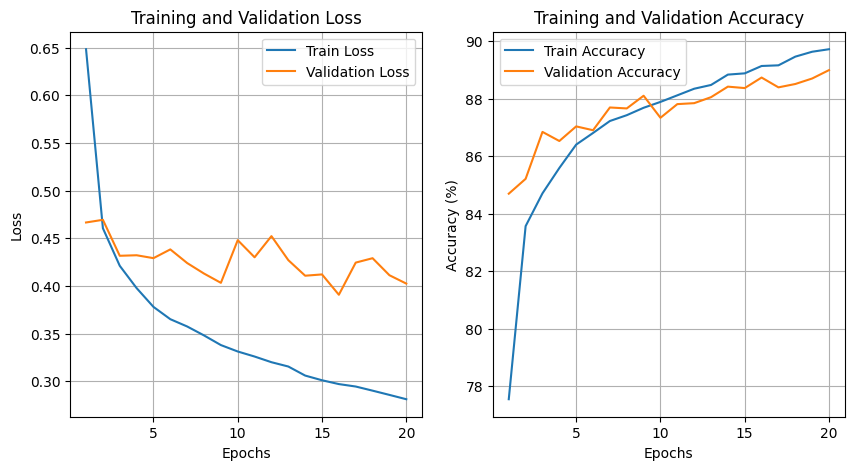

In [ ]:
plots(train_loss_list1, val_loss_list1, train_acc_list1 , val_acc_list1)

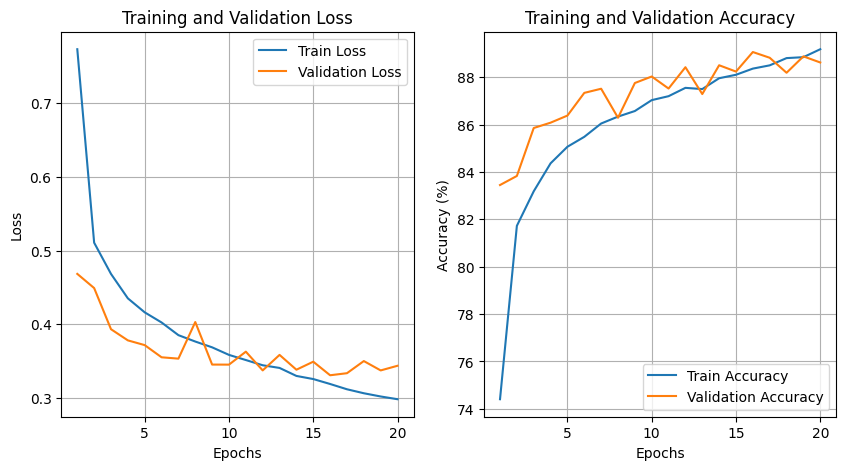

In [ ]:
plots(train_loss_list2, val_loss_list2, train_acc_list2 , val_acc_list2)

###**Summary - Model Descriptions and Differences**

Model 1, named `DropAndNorm`, uses the built-in PyTorch `Dropout` and `LayerNorm` layers. After each fully connected (fc) layer, it applies dropout to randomly zero out some of the activations, followed by layer normalization to normalize the activations. The network consists of three fully connected layers, with the final layer outputting logits which are passed through a log-softmax activation for classification.

Model 2, named `MyDropNorm`, incorporates a custom `DropNorm` layer that combines dropout and normalization in a single layer. This custom layer drops a fixed percentage of activations uniformly across the batch, and then normalizes the remaining activations. Similar to Model 1, it has three fully connected layers, with the final output also processed through a log-softmax activation.

Both models have very simillar arctiecture, and are trained using the Adam optimizer with a learning rate of 0.001 and over 20 epochs.

The main differences between the two models are:

1. **Dropout Application**: Model 1 introduces more randomness than Model 2 because the dropout layer is applied to each individual example rather than once per batch. This results in better handling of overfitting.
2. **Normalization Scope**: Model 1 normalizes all activations, whereas Model 2 normalizes only the activations that are not dropped out. Meaning that,  in the built-in layer LayerNorm, the reset neurons from the prvieous dropout layer are considered to have a value of 0 and contribute to the calculation of the mean and variance. That is, they are and are not actually thrown as in the DropNorm layer mechanism, that is actually inconsistent with the action of dropping.

In addition, Using PyTorch's built-in layers allows more flexibility as you can choose to use dropout and normalization separatly in any order that yields better results.

**Conclusions:**
The training progress for each model was very similar, as did their performance on the test set.  Model 1's results appear slightly better.

The rate of convergence was also very similar, after 20 epochs in both models an accuracy percentage of around 89% was obtained for the training, 88%-89% and accordingly 88.5 % and 87.74 % on the test set.

Looking at the graphs, we see a very similar progress on training and
 less overfit in the 2nd model (but not significantly).

The running time was very similar and was 166 seconds for model 1 and 191 seconds for model 2.

while there are differences in the dropout and normalization mechanisms between the models, these variances did not lead to discernible discrepancies in training dynamics or final performance. Both approaches appear to be viable options, and the choice between them may depend on factors such as computational efficiency, interpretability, or specific requirements of the task at hand.

Considering the pros and cons I mentioned above, I would prefer Model 1 with the built-in PyTorch layers, as it provides more randomness, which should better prevent overfitting in deeper networks.


Remark: Adam optimizer performed better than SGD so I chose to use it. Below is a brief review of the method.

Adam (Adaptive Moment Estimation) Optimizer main components which helps stabilize the learning process:

**Adaptive Learning Rate:** The optimizer calculates different learning rates for each parameter, allowing the model to learn at an appropriate pace for each parameter. This is particularly important for parameters with high or low variance.

**Momentum:** The optimizer maintains moving averages of both the gradients and their squares, which helps to smooth out gradient fluctuations and allows for more stable model progression.

**Two Moving Averages:** Adam uses two moving averages – one for the gradients and one for the squared gradients, thus combining the advantages of AdaGrad and RMSProp methods.